In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Aufgabe 1a

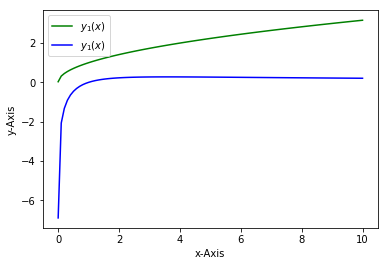

In [2]:

fig, a = plt.subplots()

x = np.linspace(0.001,10,100)


f1 = np.sqrt(x)
f2 = (np.log(x)) / (x+1)

a.plot(x, f1, color= "green", label="$y_1(x)$")
a.plot(x, f2, color="blue", label="$y_1(x)$")

a.set_xlabel("x-Axis")
a.set_ylabel("y-Axis")
a.legend()

plt.show()

# Aufgabe 1b


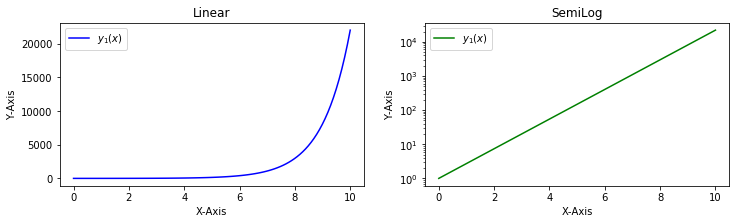

In [3]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
x = np.linspace(0, 10, 100)


F1 = np.exp(x)

ax[0].set_title('Linear')
ax[1].set_title('SemiLog')

ax[0].plot(x,F1,color = "blue", label = "$y_1(x)$")
ax[1].semilogy(x, F1, color = "green", label="$y_1(x)$")



for axis in ax:
    axis.set_xlabel('X-Axis')
    axis.set_ylabel('Y-Axis')
    axis.legend()

plt.show()



# Aufgabe 1c

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power


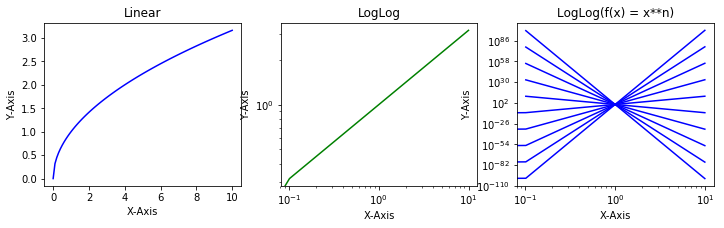

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12,3))

x = np.linspace(0, 10, 100)
n = np.linspace(-100, 100, 10)


F1 = x**(1/2)   # np.sqrt(x)


ax[0].plot(x,F1,color = "blue", label = "$y_1(x)$")
ax[1].loglog(x,F1,color = "green", label = "$y_1(x)$")




for number in n: 
    F2 = x**number
    ax[2].loglog(x,F2,color = "blue", label = "$y_1(x)$")
   

    ax[0].set_title('Linear')
    ax[1].set_title('LogLog')
    ax[2].set_title('LogLog(f(x) = x**n)')


for axis in ax:
    axis.set_xlabel('X-Axis')
    axis.set_ylabel('Y-Axis')
    


plt.show()



# Aufgabe 1d

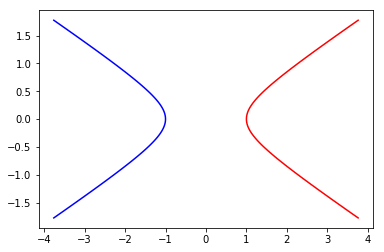

In [5]:
fig, ax = plt.subplots()

a = 0.1
e = 5

b = a * (np.sqrt(e ** 2 - 1))

t = np.linspace(-2, 2, 100)

xPlus = np.cosh(t)
xMinus = - xPlus

y = b * np.sinh(t)


ax.plot(xPlus,y, color="red")
ax.plot(xMinus,y, color="blue")

plt.show()

# Aufgabe 1e

In [1]:
from scipy import linalg as la
import pylab

y = []
x = []
y_every_second = []
x_every_second = range(-10, 11, 2)
index = 0

dataFile = open("UnbekannteDaten.txt", 'r')
dataFile.readline()
for line in dataFile:
    yPart, xPart = line.split()
    y.append(float(yPart))
    x.append(float(xPart))
    if index % 2 == 0:
        y_every_second.append(float(yPart))
    index += 1
dataFile.close()

def rSquared(observed, predicted):
    err = ((predicted - observed)**2).sum()
    meanError = err/ len(observed)
    return 1 - (meanError/np.var(observed))

sol = pylab.polyfit(x_every_second, y_every_second, 3)
fit = pylab.polyval(sol, x)

def get_Error_for_degree(degree):
    sol =  pylab.polyfit(x_every_second, y_every_second, degree)
    fit = pylab.polyval(sol, x)
    return rSquared(y, fit)

err_function = []
x_err = range(1,9)
for i in range(1, 9):
    err_function.append(get_Error_for_degree(i))

    
print("Best Value:", max(err_function))
    
# Plot Data and Fit of Degree 3
fig, ax = plt.subplots(1,2, figsize=(12, 3))
ax[0].plot(x, y, 'go', alpha=0.5, label="$Data$")
ax[0].plot(x, fit, lw=2, label="Fit of Degree 3 (best Fit)")
ax[0].legend()
ax[0].set_xlabel("x-Axis")
ax[0].set_ylabel("y-Axis")

#Plot error
ax[1].plot(x_err, err_function, lw=2, label="Function of the error")
ax[1].legend()
ax[1].set_xlabel("x-Axis")
ax[1].set_ylabel("y-Axis")
plt.show()

ModuleNotFoundError: No module named 'scipy'

# Aufgabe 2a

In [10]:
def bisection(f, a, b, N):
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1, N + 1):
        m_n = (a_n + b_n) / 2
        f_m_n = f(m_n)
        if f(a_n) * f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n) * f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n) / 2

In [11]:
def secant(f, a, b, N):
    if f(a) * f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1, N + 1):
        m_n = a_n - f(a_n) * (b_n - a_n) / (f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n) * f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n) * f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n) * (b_n - a_n) / (f(b_n) - f(a_n))


In [12]:
def newton(f, Df, x0, epsilon, max_iter):

    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after', n, 'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn / Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None


In [13]:
# i)
def f(x):
    return np.cos(x) - x

# ii)
def j(x):
    return x - (2 * np.sin(x))

def dj(x):
    return 1 - 2 * np.cos(x)

# iii)
def q(x):
    return (2 - np.exp(-x)) - x

# iv)
def p(x):
    return (np.exp(1 - x ** 2)) - x


In [14]:
print("i) f(x) = cos(x) - x")
result1 = secant(f,-5,5,50)
print(result1)

i) f(x) = cos(x) - x
Found exact solution.
0.7390851332151607


In [15]:
print("ii) j(x) = x - 2 * np.sin(x)")
result2 = newton(j,dj,-2,1e-8,500)
print(result2)
result3 = newton(j,dj,-0.2,1e-8,500)
print(result3)
result4 = newton(j,dj,1,1e-8,500)
print(result4)

ii) j(x) = x - 2 * np.sin(x)
Found solution after 3 iterations.
-1.8954942672087132
Found solution after 3 iterations.
9.529120656610879e-22
Found solution after 13 iterations.
1.895494267034033


In [16]:
print("iii) q(x) = (2 - np.exp(-x)) - x")
result5 = secant(q,-2,1,500)
print(result5)
result6 = secant(q,-1,3,500)
print(result6)

iii) q(x) = (2 - np.exp(-x)) - x
Found exact solution.
-1.1461932206205825
Found exact solution.
1.8414056604369606


In [17]:
print("iv) p(x) = (np.exp(1 - x ** 2)) - x")
result7 = bisection(p,-5,5,100)
print(result7)

iv) p(x) = (np.exp(1 - x ** 2)) - x
Found exact solution.
1.0


# Aufgabe 2b

Text(0, 0.5, '$T$')

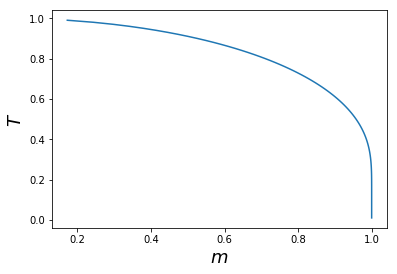

In [18]:
def fixpt(f, x, epsilon=1.0E-6, N=500):
    y = f(x)
    n = 0
    while abs(y - x) >= epsilon and n < N:
        x = f(x)
        n += 1
        y = f(x)
        if n >= N:
            return "No fixed point for given start value"
    return y
        
# define f
def f(x):
    return np.tanh(x/t)

fig, ax = plt.subplots()

# find fixed point
t = 0.01 
resu = []
ts = []
for i in range(0,99):
    ts.append(t)
    res = fixpt(f, 0.1)
    t = t+0.01
    resu.append(res)

ax.plot(resu,ts)
ax.set_xlabel(r"$m$", fontsize=18)
ax.set_ylabel(r"$T$", fontsize=18)




# Aufgabe 2c

In [ ]:
from sympy import *
# i)

x, y, a, b = symbols('x y a b')
solu = solve((b - a*y - x**2 * y, -x + a * y + x**2 * y ), (y, x))
print('y=',solu[0][0])
print('x=', solu[0][1])


# ii)
#x = b
x,y,b,a = symbols("x y b a")
solx = solve(b-a*y-x**2*y,x)
soly = solve(-x + a * y + x**2 * y,y)
print('x=', solx[0])
print('x=', solx[1])
print('y=',soly)


a = 1
b = 2

f = lambda x,y: y * (a+x**2)
g = lambda x: b/(a+x**2)

def fixedp(f,g,x0,y0,tol=10e-5,maxiter=100):
    e = 1
    itr = 0
    xp = []
    while(e > tol and itr < maxiter):
        x = f(x0,y0)  
        y0 = g(x0)
        e = norm(x0-x)
        x0 = x
        xp.append(x)
        itr = itr + 1
    return x, y0,xp

sol = fixedp(f,g, 2,2)


fs_plus = lambda x, y: np.sqrt(-a + b/y)
gs = lambda x: x / (a+x**2)
s =  fixedp(fs_plus,gs, 0.1,0.1)
print(s[0],s[1])

fs_minus = lambda x,y: np.sqrt(-a + b/y)
s =  fixedp(fs_minus,gs,0.1,0.1)
print(s[0],s[1])

# Aufgabe 2d

In [ ]:
#i)

G,M,R,r,m,w = symbols('G,M,R,r,m,w')
sol = solve((G*M)/(r**2)-(G*m)/((R-r)**2),(w**2 * r), r)



fneg = sol[0][r]
fpos = sol[1][r]

print(fneg)
print(fpos)

#ii)
G = 6.674e-11
M = 5.974e24
R = 3.844e8
m = 7.348e22
w = 2.662e-6

fneg = R*(M - sqrt(M*m))/(M - m)
print(fneg)
fpos = R*(M + sqrt(M*m))/(M - m)
print(fpos)